# Check Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from os import listdir
from os.path import isfile, join

In [15]:
#y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
#y_data_cat

0       0
1       1
2       1
3       1
4       1
       ..
2652    1
2653    0
2654    0
2655    0
2656    0
Length: 2657, dtype: int64

### A. Architecture and compilation of a CNN

### B. Training the CNN

### C. Evaluate model's performance

# 1. The Convolutional Neural Network for Redshift pattern

### A. Retrieve dataset

In [12]:
import shutil
import random

def generate_balanced_dataset(galaxy_dir, star_dir, galaxy_aug_dir, star_aug_dir, balanced_dir):
    # Ensure the balanced directory exists
    if not os.path.exists(balanced_dir):
        os.makedirs(balanced_dir)
    # Get the list of files in each directory
    galaxy_files = os.listdir(galaxy_dir)
    star_files = os.listdir(star_dir)
    galaxy_aug_files = os.listdir(galaxy_aug_dir)
    star_aug_files = os.listdir(star_aug_dir)
    # Count the number of images in each directory
    galaxy_count = len(galaxy_files)
    star_count = len(star_files)
    galaxy_aug_count = len(galaxy_aug_files)
    star_aug_count = len(star_aug_files)
    # Copy all original images to the balanced directory
    for file in galaxy_files:
        shutil.copy(os.path.join(galaxy_dir, file), balanced_dir)
    for file in star_files:
        shutil.copy(os.path.join(star_dir, file), balanced_dir)
    if galaxy_aug_count > star_aug_count:
        # Copy all star augmented images to the balanced directory
        for file in star_aug_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)
        # Copy star_aug_count - (galaxy_count - star_count) galaxy augmented images to the balanced directory
        additional_files = random.sample(galaxy_aug_files, star_aug_count - (galaxy_count - star_count))
        for file in additional_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
    else:
        # Copy all galaxy augmented images to the balanced directory
        for file in galaxy_aug_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
        # Copy galaxy_aug_count - (star_count - galaxy_count) star augmented images to the balanced directory
        additional_files = random.sample(star_aug_files, galaxy_aug_count - (star_count - galaxy_count))
        for file in additional_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)

## Data

In [5]:
from space_agent.interface.interface_main import create_rotated_images, copy_images_sorted

In [6]:
create_rotated_images()
copy_images_sorted()

index: 0 - rc: 0 - RAS
index: 1 - rc: 0 - RAS
index: 2 - rc: 0 - RAS
index: 3 - rc: 0 - RAS
index: 4 - rc: 0 - RAS
index: 5 - rc: 0 - RAS
index: 6 - rc: 0 - RAS
index: 7 - rc: 0 - RAS
index: 8 - rc: 0 - RAS
index: 9 - rc: 0 - RAS
index: 10 - rc: 0 - RAS
index: 11 - rc: 0 - RAS
index: 12 - rc: 0 - RAS
index: 13 - rc: 0 - RAS
index: 14 - rc: 0 - RAS
index: 15 - rc: 0 - RAS
index: 16 - rc: 0 - RAS
index: 17 - rc: 0 - RAS
index: 18 - rc: 0 - RAS
index: 19 - rc: 0 - RAS
index: 20 - rc: 0 - RAS
index: 21 - rc: 0 - RAS
index: 22 - rc: 0 - RAS
index: 23 - rc: 0 - RAS
index: 24 - rc: 0 - RAS
index: 25 - rc: 0 - RAS
index: 26 - rc: 0 - RAS
index: 27 - rc: 0 - RAS
index: 28 - rc: 0 - RAS
index: 29 - rc: 0 - RAS
index: 30 - rc: 0 - RAS
index: 31 - rc: 0 - RAS
index: 32 - rc: 0 - RAS
index: 33 - rc: 0 - RAS
index: 34 - rc: 0 - RAS
index: 35 - rc: 0 - RAS
index: 36 - rc: 0 - RAS
index: 37 - rc: 0 - RAS
index: 38 - rc: 0 - RAS
index: 39 - rc: 0 - RAS
index: 40 - rc: 0 - RAS
index: 41 - rc: 0 - RAS
in

In [7]:
image_star_dir = "/Users/nataliamenacho/code/NMenacho/To-infinity-and-beyond/data/images_cropped_sorted/STAR"
image_galaxy_dir = "/Users/nataliamenacho/code/NMenacho/To-infinity-and-beyond/data/images_cropped_sorted/GALAXY"
image_star_aug_dir = "/Users/nataliamenacho/code/NMenacho/To-infinity-and-beyond/data/images_cropped_from_augmentation/STAR"
image_galaxy_aug_dir = "/Users/nataliamenacho/code/NMenacho/To-infinity-and-beyond/data/images_cropped_from_augmentation/GALAXY"
image_bal_dir = "/Users/nataliamenacho/code/NMenacho/To-infinity-and-beyond/data/images_final"

generate_balanced_dataset(image_galaxy_dir, image_star_dir,  image_galaxy_aug_dir, image_star_aug_dir,image_bal_dir)

NameError: name 'generate_balanced_dataset' is not defined

In [8]:
image_dir = os.environ['IMAGE_FINAL']

#image_files = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

image_files = []
for f in listdir(image_dir):
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []

y_list_rs = []
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat_rs = image_info[4]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list_rs.append(cat_rs)

print(y_list_rs)
X_data = np.array(X_list)
print(X_data.shape)
y_data_rs = np.array(y_list_rs)
print(y_data_rs.shape)

KeyError: 'IMAGE_FINAL'

In [17]:

# Split the dataset
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_data,y_data_rs,
                                                    test_size=0.3,
                                                    random_state=42)

## Models

In [33]:
model_rs_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='linear')
])

/Users/sarahakamiezan/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the models
models_rs = [model_rs_1, model_rs_2, model_rs_3, model_rs_4, model_rs_5]
for i, model_rs in enumerate(models_rs, start=1):
    model_rs.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae', 'mse'])
    print(f"Model {i} compiled.")


Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.
Model 5 compiled.


In [20]:
X_data.shape

(17418, 128, 128, 3)

#### Baseline

In [28]:
y_train_rs.astype(float).mean()

0.6324156844613751

#### Training model 1

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)
history_rs = model_rs_1.fit(X_train_rs,y_train_rs.astype(float),
                        batch_size=16,
                        epochs=10,
                        validation_split=0.3,
                        callbacks=[es])

Epoch 1/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - loss: 4890.4561 - mae: 7.1060 - mse: 4890.4561 - val_loss: 1.0362 - val_mae: 0.6263 - val_mse: 1.0362
Epoch 2/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - loss: 1.0157 - mae: 0.6264 - mse: 1.0157 - val_loss: 1.0093 - val_mae: 0.6147 - val_mse: 1.0093
Epoch 3/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - loss: 0.9553 - mae: 0.6007 - mse: 0.9553 - val_loss: 0.9720 - val_mae: 0.5986 - val_mse: 0.9720
Epoch 4/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - loss: 0.9342 - mae: 0.5875 - mse: 0.9342 - val_loss: 0.9262 - val_mae: 0.5802 - val_mse: 0.9262
Epoch 5/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - loss: 0.9069 - mae: 0.5821 - mse: 0.9069 - val_loss: 0.8746 - val_mae: 0.5626 - val_mse: 0.8746
Epoch 6/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - loss: 0.9078 - mae: 0.5773 - mse: 0.9078 - val_loss: 0.8201 - val_mae: 0.5470 - val_mse: 0.8201
Epoch 7/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - loss: 0.8455 - mae: 0.5592

#### Plot Model 1

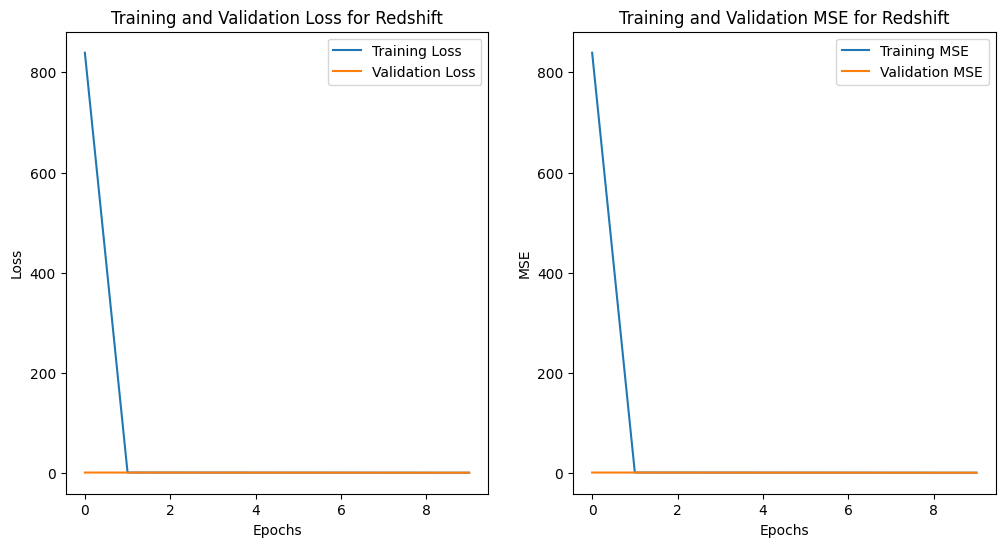

In [36]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_rs.history['loss'], label='Training Loss')
plt.plot(history_rs.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Redshift')
plt.legend()

# Plot the training and validation MSE
plt.subplot(1, 2, 2)
plt.plot(history_rs.history['mse'], label='Training MSE')
plt.plot(history_rs.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSE for Redshift')
plt.legend()

plt.show()

#### Models 2,3,4,5

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories_rs = []

# Train each model and store the history
for i, model_rs in enumerate(models_rs, start=1):
    print(f"Training Model {i}...")
    history_rs = model_rs.fit(X_train_rs, y_train_rs.astype(float),
                        batch_size=16,
                        epochs=10,
                        validation_split=0.2,
                        callbacks=[es])
    histories_rs.append(history_rs)
    print(f"Model {i} trained.")

Training Model 1...
Epoch 1/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 0.6675 - mae: 0.5343 - mse: 0.6675 - val_loss: 0.6732 - val_mae: 0.5410 - val_mse: 0.6732
Epoch 2/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - loss: 0.6103 - mae: 0.5276 - mse: 0.6103 - val_loss: 0.6673 - val_mae: 0.5519 - val_mse: 0.6673
Epoch 3/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 0.6220 - mae: 0.5428 - mse: 0.6220 - val_loss: 0.6659 - val_mae: 0.5582 - val_mse: 0.6659
Epoch 4/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 0.6385 - mae: 0.5600 - mse: 0.6385 - val_loss: 0.6656 - val_mae: 0.5602 - val_mse: 0.6656
Epoch 5/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 0.6291 - mae: 0.5511 - mse: 0.6291 - val_loss: 0.6655 - val_mae: 0.5624 - val_mse: 0.6655
Epoch 6/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 0.6721 - mae: 0.5713 - mse: 0.6721 - val_loss: 0.6657 - val_mae: 0.5596 - val_mse: 0.6657
Epoch 7/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 0.6542

#### Plots Models

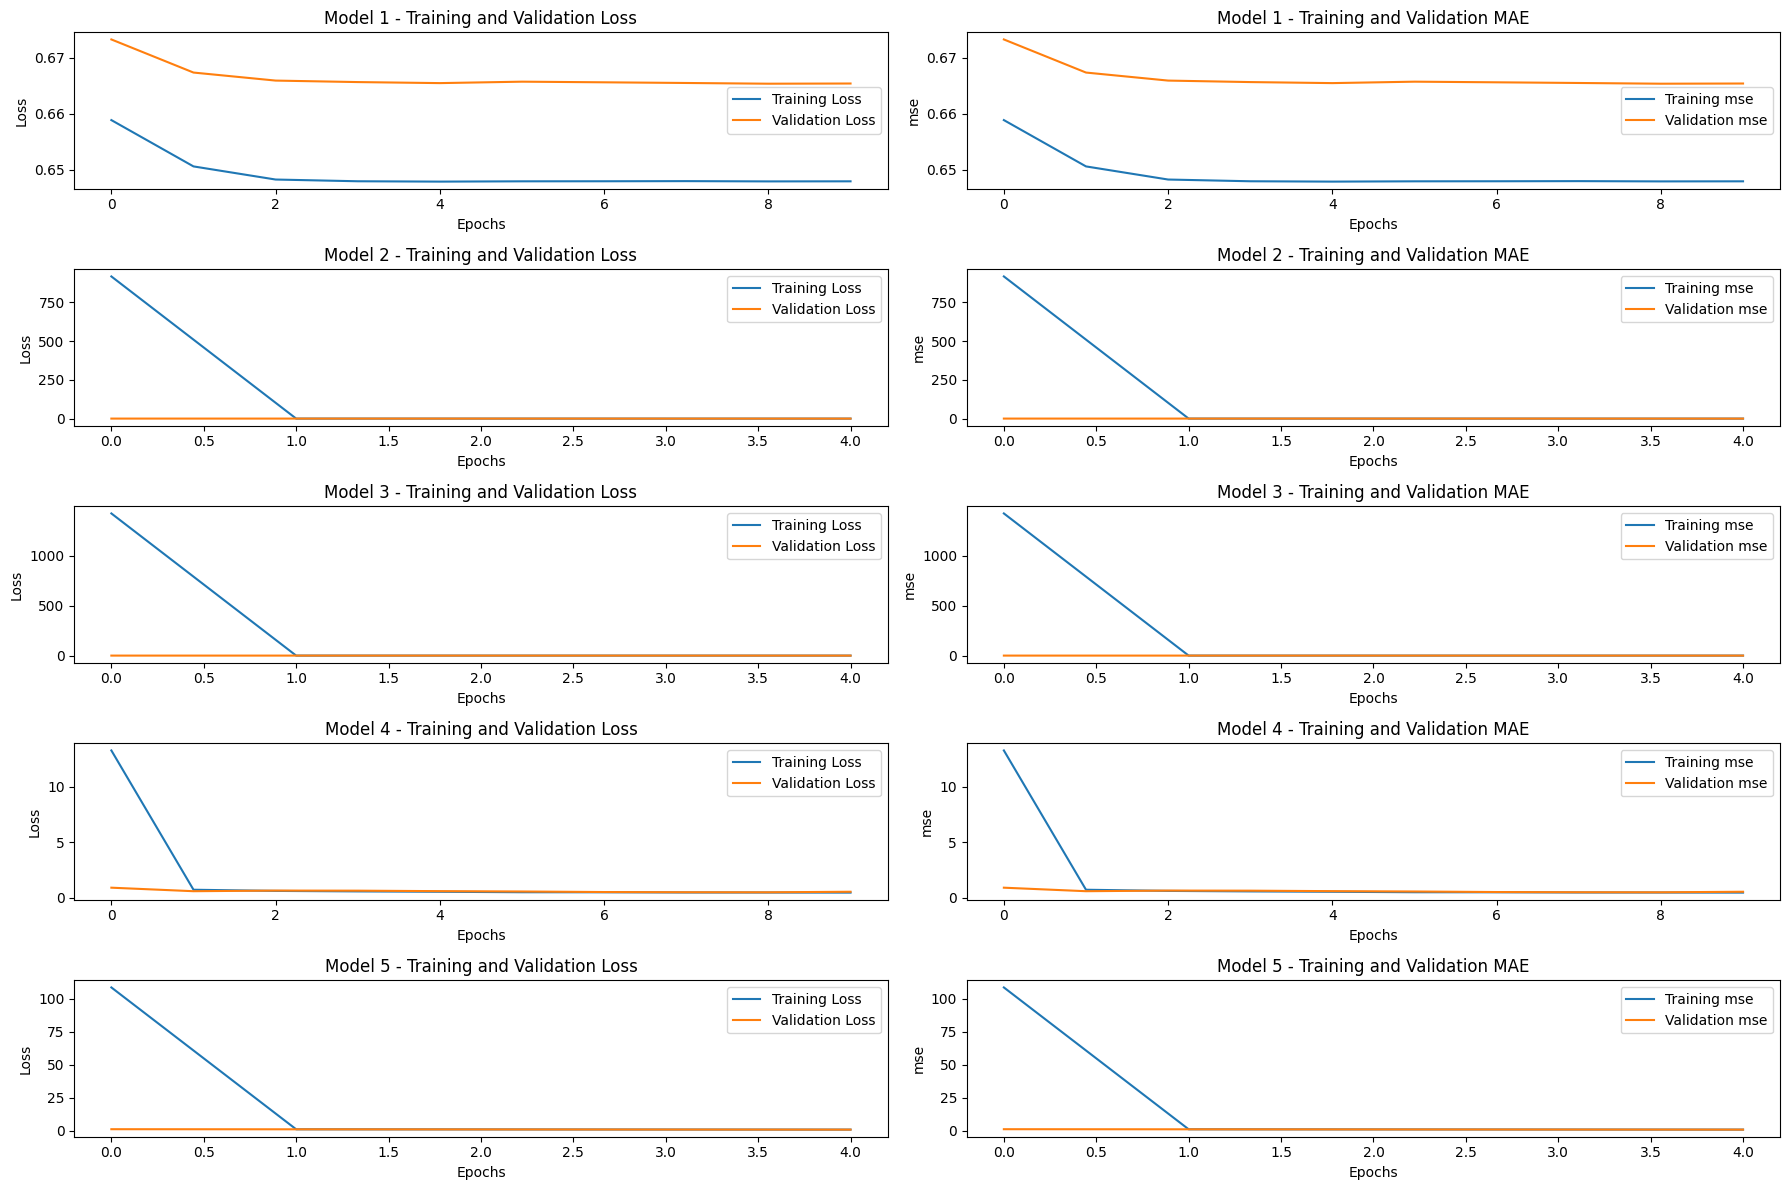

In [42]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history_rs in enumerate(histories_rs, start=1):
    plt.subplot(5, 2, i * 2 - 1)
    plt.plot(history_rs.history['loss'], label='Training Loss')
    plt.plot(history_rs.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(5, 2, i * 2)
    plt.plot(history_rs.history['mae'], label='Training MAE')
    plt.plot(history_rs.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title(f'Model {i} - Training and Validation MAE')
    plt.legend()

plt.tight_layout()
plt.show()

### Saving models

In [1]:
model_rs_2.save('../models/to-infinity-beyond.model_redshift.02.keras')
model_rs_4.save('../models/to-infinity-beyond.model_redshift.04.keras')
model_rs_5.save('../models/to-infinity-beyond.model_redshift.05.keras')

NameError: name 'model_rs_2' is not defined